In [9]:
# In Turkish football, it has been recently ruled that, in lower divisions at least two U-23 players must be starting the match. Even though it is banned to have foreign players in lower divisions in Turkey,this rule inspired me to find new, young footballers because it is hard for teams to scout and find young prospects good enough for starting 11. I will look for wonderkids who can score, assist and make an impact because i have that attacking mentality. 

import pandas as pd


df = pd.read_csv('/kaggle/input/football-players-stats-2024-2025/players_data-2024_2025.csv')


selected_columns = [
    'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
    'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'CrdR', 'PrgC',
    'SoT%', 'KP', 'Touches'
]


filtered_df = df[selected_columns]





filtered_df.to_csv('filtered_players_data.csv', index=False)
pd.set_option("display.width", 1000)


pd.set_option("display.max_rows", 100)
filtered_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,Gls,Ast,G+A,CrdR,PrgC,SoT%,KP,Touches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25.0,2000.0,3,1,86,0,0,0,0,1,NaN,0,73
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,25.0,2000.0,2,1,104,0,0,0,0,0,NaN,1,59
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0,0,0,0,3,0.0,0,36
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,21.0,2004.0,6,0,88,0,0,0,0,3,0.0,0,65
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,19.0,2006.0,1,0,3,0,0,0,0,1,NaN,0,4


In [11]:
# I prepared my dataset but i need to make some changes. I need to see younger players who would be eligible for my registration.
filtered_df_under_23 = filtered_df[df["Age"] <= 23]
filtered_df_under_23.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,Gls,Ast,G+A,CrdR,PrgC,SoT%,KP,Touches
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0,0,0,0,3,0.0,0,36
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,21.0,2004.0,6,0,88,0,0,0,0,3,0.0,0,65
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,19.0,2006.0,1,0,3,0,0,0,0,1,NaN,0,4
11,12,Nabil Aberdin,fr FRA,MF,Getafe,es La Liga,22.0,2002.0,7,4,263,0,0,0,0,2,0.0,1,87
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,22.0,2003.0,28,27,2248,8,2,10,0,58,36.9,21,717


In [12]:
# We need to consider playing time among the younger footballers because they need experience to grow and be better.
df_minutes = filtered_df_under_23.sort_values(by="Min", ascending=False)
df_minutes.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,Gls,Ast,G+A,CrdR,PrgC,SoT%,KP,Touches
566,567,Nathan Collins,ie IRL,DF,Brentford,eng Premier League,23.0,2001.0,32,32,2880,2,2,4,0,25,33.3,8,2080
426,427,Moisés Caicedo,ec ECU,MF,Chelsea,eng Premier League,23.0,2001.0,32,32,2811,1,2,3,0,37,17.6,27,2196
2471,2472,Zion Suzuki,jp JPN,GK,Parma,it Serie A,22.0,2002.0,31,31,2774,0,0,0,1,0,NaN,0,1315
1790,1791,Murillo,br BRA,DF,Nott'ham Forest,eng Premier League,22.0,2002.0,31,31,2748,1,0,1,0,19,20.0,12,1616
1034,1035,Ryan Gravenberch,nl NED,MF,Liverpool,eng Premier League,22.0,2002.0,32,32,2741,0,3,3,0,60,25.0,24,2056


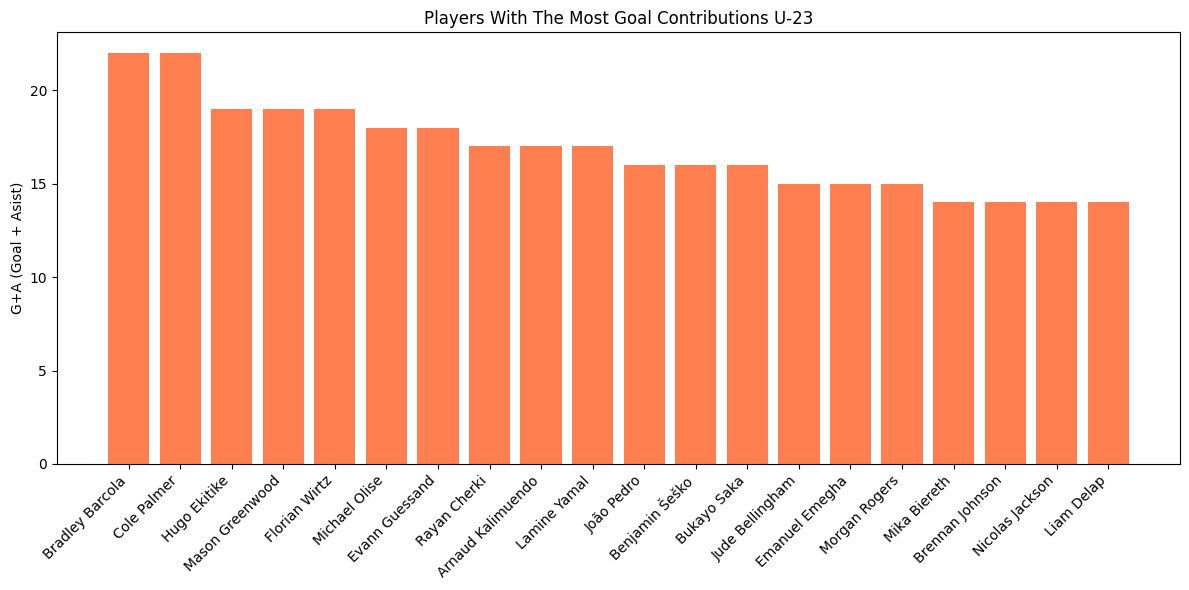

In [14]:
# Now i can see players with the most minutes played in the beginning of my list. I want to see the players with the most goal contributions so i can see the players with the most scores made.
import matplotlib.pyplot as plt


top_contributors = filtered_df_under_23.sort_values(by="G+A", ascending=False).head(20)

plt.figure(figsize=(12, 6))


plt.bar(top_contributors["Player"], top_contributors["G+A"], color="coral")


plt.ylabel("G+A (Goal + Asist)")
plt.title("Players With The Most Goal Contributions U-23")


plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()

C:\Users\tlgmz\AppData\Local\Temp\ipykernel_12832\921594847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_under_23["G+A_per_min"] = filtered_df_under_23["G+A"] / filtered_df_under_23["Min"]


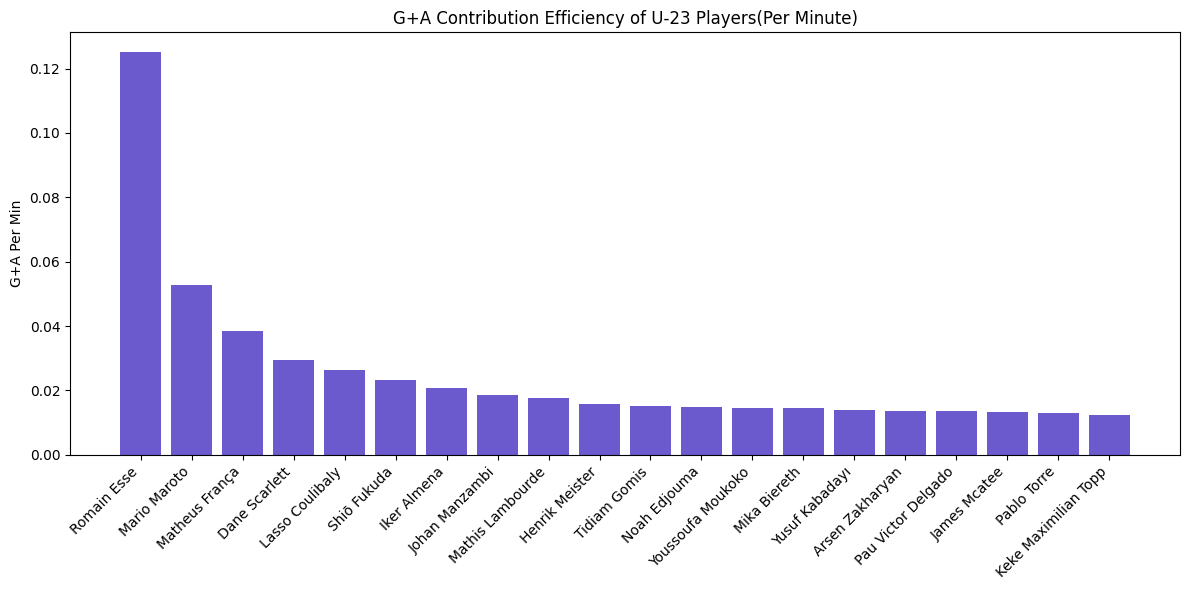

In [18]:
# I see the players with the most goal contributions but it is important to be effective even if you play less minutes than other players. We can check effectiveness per minute because we don't want to miss the players with less minutes played while looking for goal contributions.
filtered_df_under_23["G+A_per_min"] = filtered_df_under_23["G+A"] / filtered_df_under_23["Min"]

df_ratio = filtered_df_under_23.dropna(subset=["G+A_per_min"])
df_ratio = df_ratio[df_ratio["G+A_per_min"] != float('inf')]


top_efficiency = df_ratio.sort_values(by="G+A_per_min", ascending=False).head(20)

plt.figure(figsize=(12, 6))


plt.bar(top_efficiency["Player"], top_efficiency["G+A_per_min"], color="slateblue")

plt.ylabel("G+A Per Min")
plt.title("G+A Contribution Efficiency of U-23 Players(Per Minute)")


plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()

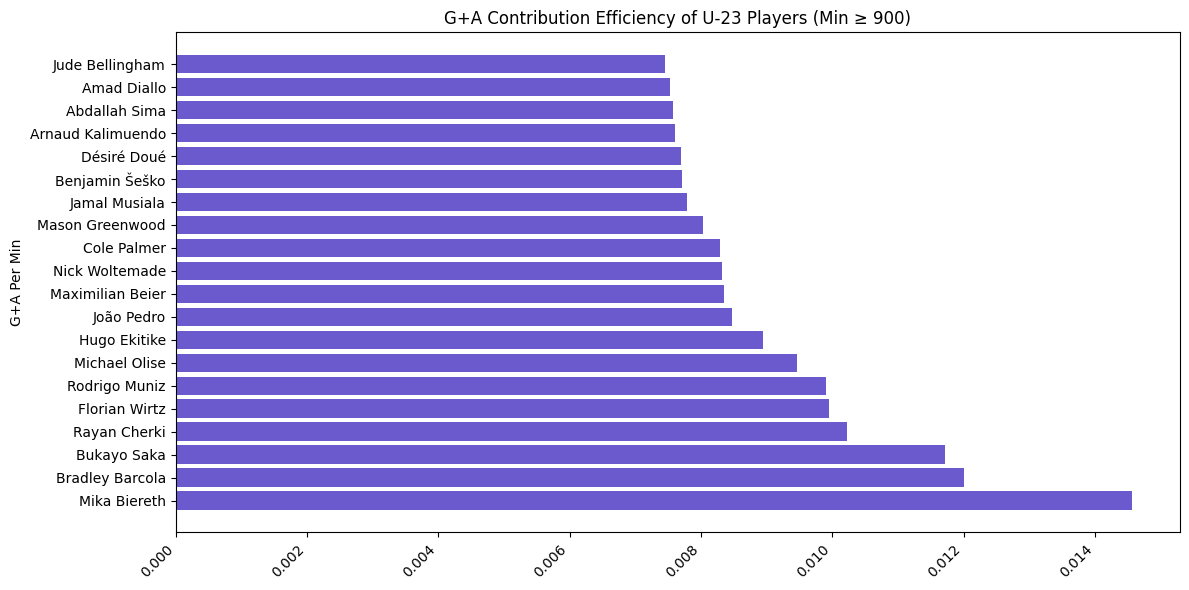

In [22]:
# This information can mislead us because we want to see both quality in contribution and experience. We will set time limit of minutes played but we will keep these players in mind.It is ideal to scout for 10 full games of a player because of that we will set our limit to 900 minutes.
filtered_df_under_23 = filtered_df_under_23[filtered_df_under_23["Min"] >= 900]


filtered_df_under_23["G+A_per_min"] = filtered_df_under_23["G+A"] / filtered_df_under_23["Min"]


df_ratio = filtered_df_under_23.dropna(subset=["G+A_per_min"])
df_ratio = df_ratio[df_ratio["G+A_per_min"] != float('inf')]


top_efficiency = df_ratio.sort_values(by="G+A_per_min", ascending=False).head(20)


plt.figure(figsize=(12, 6))
plt.barh(top_efficiency["Player"], top_efficiency["G+A_per_min"], color="slateblue")
plt.ylabel("G+A Per Min")
plt.title("G+A Contribution Efficiency of U-23 Players (Min ≥ 900)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\tlgmz\AppData\Local\Temp\ipykernel_12832\763314214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playmaker_df["KP_per_touch"] = playmaker_df["KP"] / playmaker_df["Touches"]


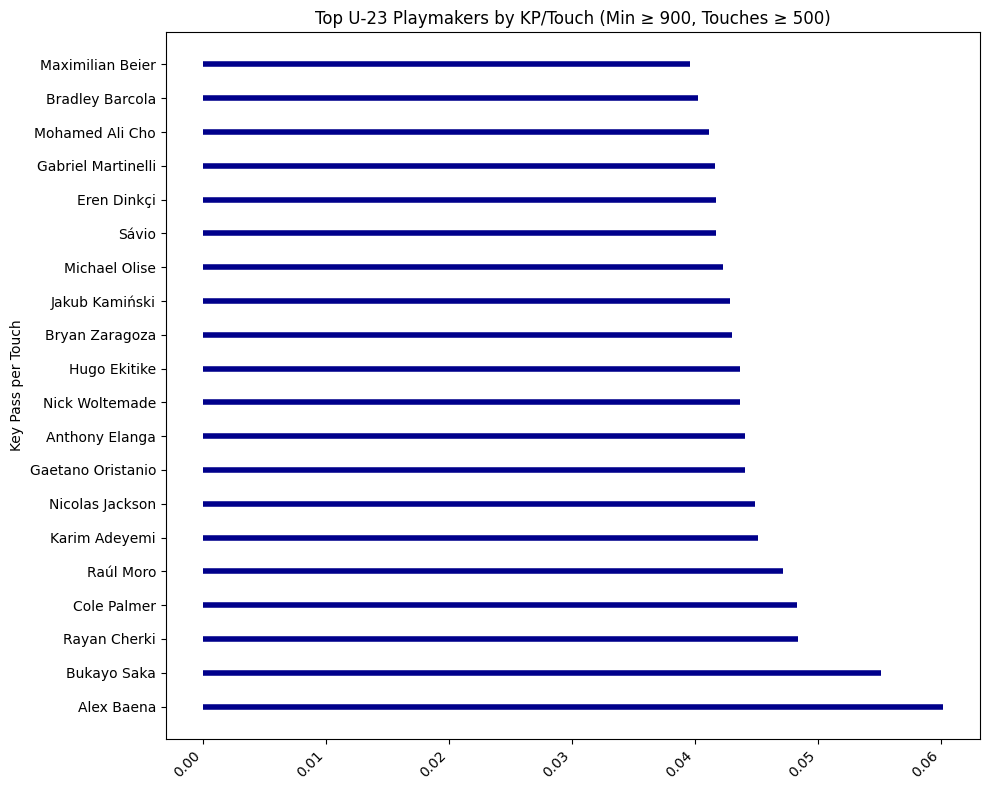

In [26]:
# Of course, we want players who can contribute with good efficiency but we need good playmakers to help them, too. Key pass is a critical value for us but it won't mean a good thing if our attacking playmaker makes extreme values of touches with small amount of key passes.

playmaker_df = filtered_df_under_23[
    (filtered_df_under_23["Min"] >= 900) &
    (filtered_df_under_23["Touches"] >= 500)
]


playmaker_df["KP_per_touch"] = playmaker_df["KP"] / playmaker_df["Touches"]


playmaker_df = playmaker_df.dropna(subset=["KP_per_touch"])
playmaker_df = playmaker_df[playmaker_df["KP_per_touch"] != float("inf")]


top_playmakers = playmaker_df.sort_values(by="KP_per_touch", ascending=False).head(20)


plt.figure(figsize=(10, 8))
plt.hlines(y=top_playmakers["Player"], xmin=0, xmax=top_playmakers["KP_per_touch"], color="darkblue",linewidth=4)
plt.ylabel("Key Pass per Touch")
plt.title("Top U-23 Playmakers by KP/Touch (Min ≥ 900, Touches ≥ 500)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

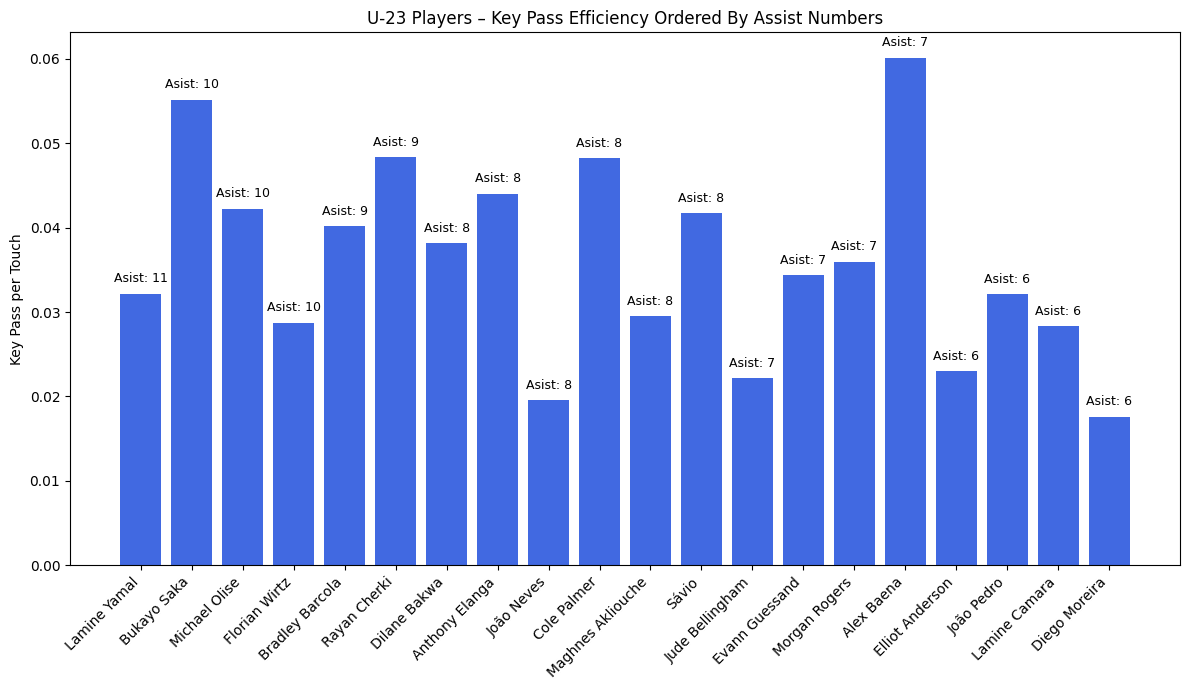

In [28]:
# I see elite playmakers with key pass to touch ratio but i need to see the numeric impact they make. I will see both the impact and the efficiency of the players with the most assists and they will be my top playmakers.
playmaker_df = playmaker_df.dropna(subset=["KP_per_touch", "Ast"])
playmaker_df = playmaker_df[playmaker_df["KP_per_touch"] != float("inf")]


sorted_df = playmaker_df.sort_values(by="Ast", ascending=False).head(20)


plt.figure(figsize=(12, 7))
bars = plt.bar(sorted_df["Player"], sorted_df["KP_per_touch"], color="royalblue")


for bar, ast in zip(bars, sorted_df["Ast"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f"Asist: {int(ast)}", ha="center", va="bottom", fontsize=9)

plt.ylabel("Key Pass per Touch")
plt.title("U-23 Players – Key Pass Efficiency Ordered By Assist Numbers")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

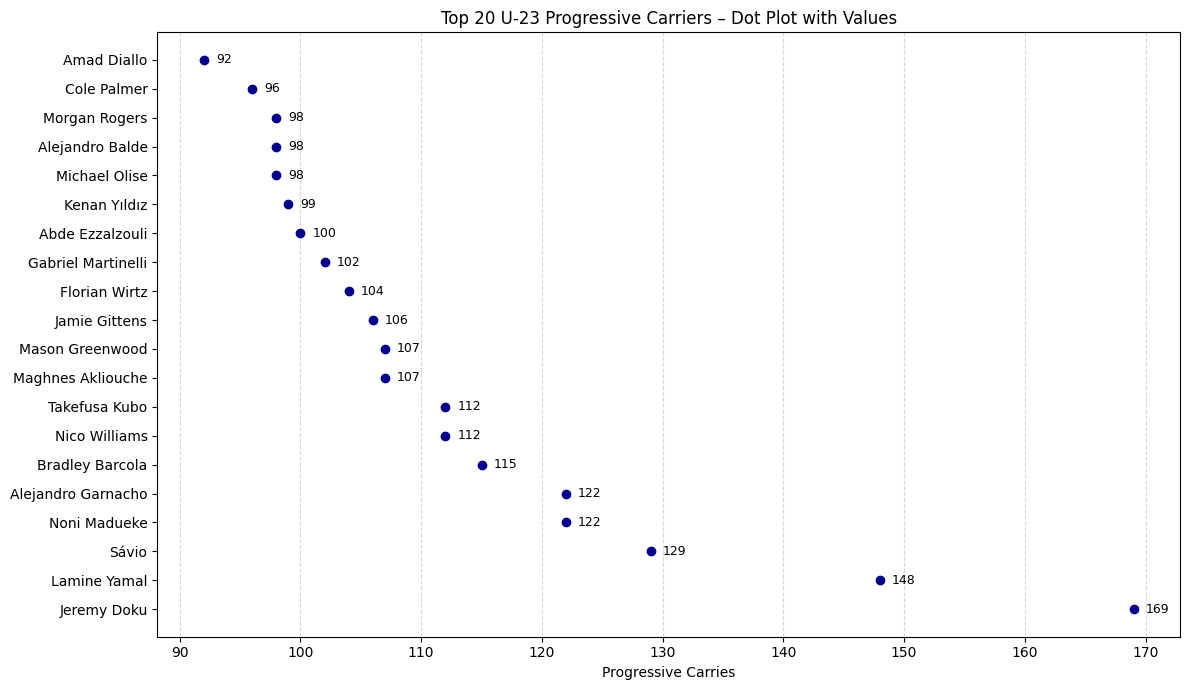

In [29]:
# I looked for goal scorers, assist makers and i won't forget the dribblers. I want young prodigies with good dribbling to attack. To find dribblers i need to look for progressive carries for minutes.
top_carriers = filtered_df_under_23[
    (filtered_df_under_23["Min"] >= 900) &
    (filtered_df_under_23["Touches"] >= 500)
].copy()

top_carriers = top_carriers.sort_values(by="PrgC", ascending=False).head(20)


plt.figure(figsize=(12, 7))
plt.plot(top_carriers["PrgC"], top_carriers["Player"], "o", color="darkblue")


for x, y in zip(top_carriers["PrgC"], top_carriers["Player"]):
    plt.text(x + 1, y, str(int(x)), va='center', fontsize=9)

plt.xlabel("Progressive Carries")
plt.title("Top 20 U-23 Progressive Carriers – Dot Plot with Values")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

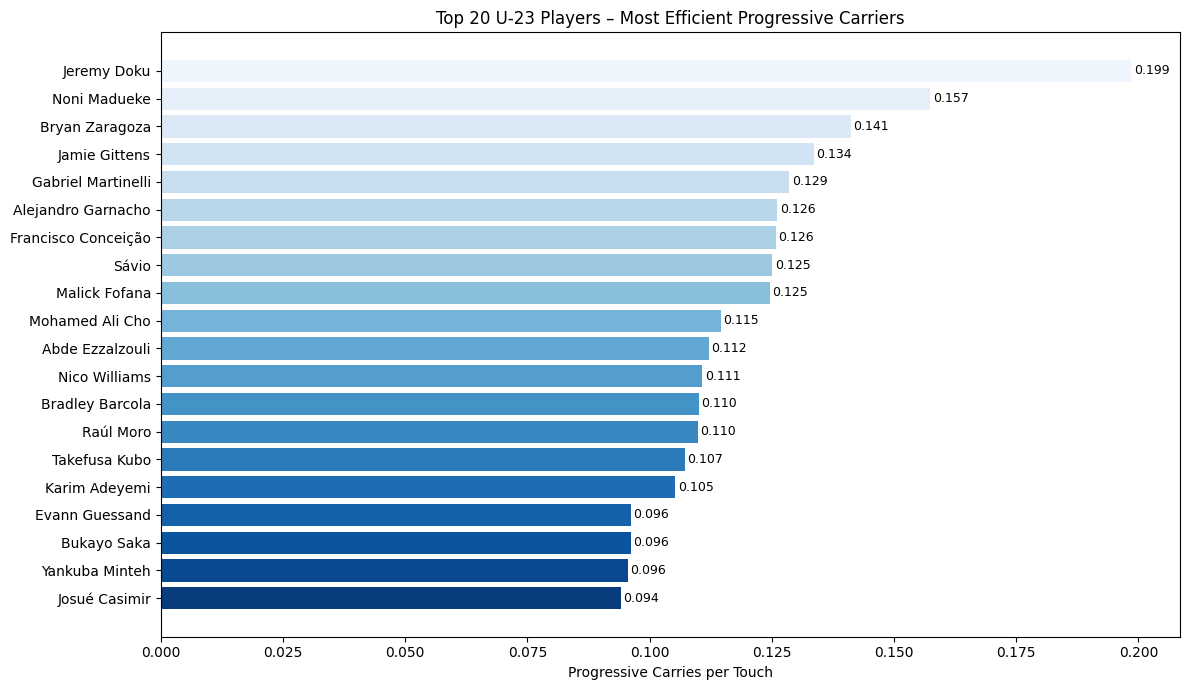

In [30]:
# I found the best young dribblers but i need them to be effective for my list. I will check progeressive carry per touch ratio to see players' tendency to dribble.
import seaborn as sns


carry_ratio_df = filtered_df_under_23[
    (filtered_df_under_23["Min"] >= 900) &
    (filtered_df_under_23["Touches"] >= 500)
].copy()

carry_ratio_df["PrgC_per_touch"] = carry_ratio_df["PrgC"] / carry_ratio_df["Touches"]
carry_ratio_df = carry_ratio_df.dropna(subset=["PrgC_per_touch"])
carry_ratio_df = carry_ratio_df[carry_ratio_df["PrgC_per_touch"] != float("inf")]


top_ratio_df = carry_ratio_df.sort_values(by="PrgC_per_touch", ascending=False).head(20)


colors = sns.color_palette("Blues", len(top_ratio_df))


plt.figure(figsize=(12, 7))
bars = plt.barh(top_ratio_df["Player"], top_ratio_df["PrgC_per_touch"], color=colors)


for bar, value in zip(bars, top_ratio_df["PrgC_per_touch"]):
    plt.text(bar.get_width() + 0.0005, bar.get_y() + bar.get_height()/2,
             f"{value:.3f}", va='center', fontsize=9)

plt.xlabel("Progressive Carries per Touch")
plt.title("Top 20 U-23 Players – Most Efficient Progressive Carriers")
plt.gca().invert_yaxis()  # En yüksek en üstte görünsün
plt.tight_layout()
plt.show()

In [32]:
# Now i have efficiency lists of goal contribution, key passes and dribbles. I need to make a list of them and see who the best young attacking threats of the 2024-2025 season. 
combined_players = pd.unique(
    pd.concat([
        top_ratio_df["Player"],
        sorted_df["Player"],
        top_efficiency["Player"]
    ])
)


combined_df = filtered_df_under_23[filtered_df_under_23["Player"].isin(combined_players)].copy()


combined_df["G+A"] = combined_df["Gls"] + combined_df["Ast"]
combined_df["G+A_per_min"] = combined_df["G+A"] / combined_df["Min"]
combined_df["KP_per_touch"] = combined_df["KP"] / combined_df["Touches"]
combined_df["PrgC_per_touch"] = combined_df["PrgC"] / combined_df["Touches"]


combined_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
combined_df = combined_df.dropna(subset=["G+A_per_min", "KP_per_touch", "PrgC_per_touch"])



final_table = combined_df.sort_values(by="G+A_per_min", ascending=False)


from IPython.display import display
display(final_table.reset_index(drop=True))

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,CrdR,PrgC,SoT%,KP,Touches,G+A_per_min,KP_per_touch,PrgC_per_touch
0,325,Mika Biereth,dk DEN,FW,Monaco,fr Ligue 1,22.0,2003.0,12,12,...,2,14,0,10,50.0,17,308,0.014568,0.055195,0.032468
1,236,Bradley Barcola,fr FRA,FW,Paris S-G,fr Ligue 1,22.0,2002.0,28,23,...,9,22,0,115,48.5,42,1045,0.012009,0.040191,0.110048
2,2248,Bukayo Saka,eng ENG,"FW,MF",Arsenal,eng Premier League,23.0,2001.0,19,16,...,10,16,0,75,36.0,43,780,0.011713,0.055128,0.096154
3,531,Rayan Cherki,fr FRA,"FW,MF",Lyon,fr Ligue 1,21.0,2003.0,25,18,...,9,17,0,72,42.9,62,1282,0.010222,0.048362,0.056162
4,2720,Florian Wirtz,de GER,"MF,FW",Leverkusen,de Bundesliga,21.0,2003.0,26,20,...,10,19,0,104,45.2,49,1705,0.009948,0.028739,0.060997
5,1784,Rodrigo Muniz,br BRA,FW,Fulham,eng Premier League,23.0,2001.0,30,7,...,1,9,0,5,47.2,7,301,0.009912,0.023256,0.016611
6,1921,Michael Olise,fr FRA,FW,Bayern Munich,de Bundesliga,23.0,2001.0,29,23,...,10,18,0,98,40.6,69,1633,0.009469,0.042254,0.060012
7,809,Hugo Ekitike,fr FRA,FW,Eint Frankfurt,de Bundesliga,22.0,2002.0,28,26,...,5,19,0,78,36.7,39,893,0.008941,0.043673,0.087346
8,1237,João Pedro,br BRA,"FW,MF",Brighton,eng Premier League,23.0,2001.0,26,22,...,6,16,0,64,36.6,29,903,0.008475,0.032115,0.070875
9,271,Maximilian Beier,de GER,"FW,MF",Dortmund,de Bundesliga,22.0,2002.0,28,16,...,5,13,0,23,31.0,24,606,0.008349,0.039604,0.037954


In [44]:
"""
   This is my final list and I have a great list of bunch of world-class youngsters. I can see the best dribblers, best passers and the best scorers at the same time! All i need 
to do is show the conclusions more clearly. I will list them by their goal contributions decreasing because it is the most important data for me. This is the guide of my list. 

Best passing+ Best dribbling+ Best goal contribution --> green

Best passing+ Best goal contribution --> yellow

Best dribbling+ Best goal contribution --> blue but not existing without best passing

Best passing+ Best dribbling --> red

 I wanted to see the variables' borders which made the players be in this list blue.
"""

set_ratio = set(top_ratio_df["Player"])
set_sorted = set(sorted_df["Player"])
set_eff = set(top_efficiency["Player"])


combined_players = set_ratio.union(set_sorted).union(set_eff)


combined_df = filtered_df_under_23[filtered_df_under_23["Player"].isin(combined_players)].copy()


combined_df["G+A"] = combined_df["Gls"] + combined_df["Ast"]
combined_df["G+A_per_min"] = combined_df["G+A"] / combined_df["Min"]
combined_df["KP_per_touch"] = combined_df["KP"] / combined_df["Touches"]
combined_df["PrgC_per_touch"] = combined_df["PrgC"] / combined_df["Touches"]


def get_color(player):
    in_ratio = player in set_ratio
    in_sorted = player in set_sorted
    in_eff = player in set_eff

    if in_ratio and in_sorted and in_eff:
        return 'background-color: lightgreen' 
    elif in_ratio and in_sorted:
        return 'background-color: lightcoral'  
    elif in_ratio and in_eff:
        return 'background-color: lightskyblue' 
    elif in_sorted and in_eff:
        return 'background-color: khaki'  
    else:
        return ''  


def highlight_rows(row):
    return [get_color(row["Player"])] * len(row)


display_cols = ["Player", "Squad", "Age", "Min", "Touches", "Gls", "Ast", 
                "G+A", "G+A_per_min", "KP", "KP_per_touch", "PrgC", "PrgC_per_touch"]


final_df = combined_df[display_cols].dropna(subset=["G+A_per_min", "KP_per_touch", "PrgC_per_touch"])
final_df = final_df.sort_values(by="G+A", ascending=False).reset_index(drop=True)


styled_df = final_df.style.apply(highlight_rows, axis=1)


def highlight_rows(row):
    return [get_color(row["Player"])] * len(row)

def highlight_metrics(df):
   
    styles = pd.DataFrame("", index=df.index, columns=df.columns)

    for i, row in df.iterrows():
        player = row["Player"]

        if player in set_ratio:
            styles.at[i, "G+A_per_min"] += "border: 2px solid deepskyblue;"
        if player in set_sorted:
            styles.at[i, "KP_per_touch"] += "border: 2px solid deepskyblue;"
        if player in set_eff:
            styles.at[i, "PrgC_per_touch"] += "border: 2px solid deepskyblue;"

    return styles


styled_df = final_df.style\
    .apply(highlight_rows, axis=1)\
    .apply(highlight_metrics, axis=None)
styled_df

,Player,Squad,Age,Min,Touches,Gls,Ast,G+A,G+A_per_min,KP,KP_per_touch,PrgC,PrgC_per_touch
0,Bradley Barcola,Paris S-G,22.000000,1832,1045,13,9,22,0.012009,42,0.040191,115,0.110048
1,Cole Palmer,Chelsea,22.000000,2652,1555,14,8,22,0.008296,75,0.048232,96,0.061736
2,Hugo Ekitike,Eint Frankfurt,22.000000,2125,893,14,5,19,0.008941,39,0.043673,78,0.087346
3,Florian Wirtz,Leverkusen,21.000000,1910,1705,9,10,19,0.009948,49,0.028739,104,0.060997
4,Mason Greenwood,Marseille,23.000000,2364,1498,16,3,19,0.008037,35,0.023364,107,0.071429
5,Evann Guessand,Nice,23.000000,2415,873,11,7,18,0.007453,30,0.034364,84,0.096220
6,Michael Olise,Bayern Munich,23.000000,1901,1633,8,10,18,0.009469,69,0.042254,98,0.060012
7,Rayan Cherki,Lyon,21.000000,1663,1282,8,9,17,0.010222,62,0.048362,72,0.056162
8,Arnaud Kalimuendo,Rennes,23.000000,2234,763,14,3,17,0.007610,17,0.022280,40,0.052425
9,Lamine Yamal,Barcelona,17.000000,2326,1617,6,11,17,0.007309,52,0.032158,148,0.091528
